#### Q75. N X M 크기의 얼음 틀로 한번에 만들 수 있는 아이스크림의 개수를 아래 입력조건에 따라 출력하는 프로그램을 DFS(Depth First Search)를 이용하여 작성하세요.
 
- 입력조건
  - 첫번째 줄에 얼음 틀의 세로 길이 N과 가로 길이 M이 주어진다.(1 <= N,M <= 1000)
  - 두번째 줄부터 N+1번째 줄까지 얼음 틀의 형태가 주어진다.
  - 이때 구멍이 뚫려있는 부분은 0 그렇지 않은 부분은 1이다.
  - 구멍이 뚫려 있는 부분끼리 상, 하, 좌, 우로 붙어 있는 경우 서로 연결되어 있는 것으로 간주한다.


* <b>DFS</b>
    - 깊이를 우선시 하여 탐색하는 방법 
    - '한 우물만 판다' 라는 느낌처럼 한 길만 계속 깊이 파고드는 방식
    <img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FoiVuV%2FbtqYusdiOdX%2FK4nhzcjlxt80MbIpWjsyrk%2Fimg.png" width = 400>
    
* <b>BFS</b>
    - 넓이를 우선시
    - 특정 노드와 연결된 모든 노드를 한번씩 거친 다음에 다음 노드로 이동하는 방식
    - 주로 최단거리를 구할 때 사용
    - 재귀적으로 동작하지 않음
    - 그래프 탐색의 경우 어떤 노드를 방문했었는지 여부를 반드시 검사해야 함
    <img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fni4Mn%2FbtqYn4EMNlG%2FVF5gXF41YWOfRGWoixkUT0%2Fimg.png" width = 400>
    
    
참고: https://lotuslee.tistory.com/48

============================스택, 큐 설명===========================

In [10]:
# 스택: 선입후출

stack = []
stack.append(5)
stack.append(2)
stack.append(3)
stack.append(7)
stack.pop(3)
stack.append(1)

stack

[5, 2, 3, 1]

In [20]:
# 큐: 선입선출
from collections import deque
queue = deque()

queue.append(5)
queue.append(2)
queue.append(3)
queue.append(7)
queue.popleft()
queue.append(1)
queue.append(4)
queue.popleft()

print(queue)

deque([3, 7, 1, 4])


========================================================================

##### 풀이
```
예시: 
nm = 5 5

00110
00011
11111
00111
11000

cnt = 4
```

In [22]:
import numpy as np

nm = input(">>n,m을 입력하세요.\n")
shape = input(">>얼음틀 모양을 입력하세요\n")

n, m = int(nm.split()[0]), int(nm.split()[1])
shape = np.array([ int(i) for i in shape.split()]).reshape(n,m)

# 5 5
# 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0

>>n,m을 입력하세요.
5 5
>>얼음틀 모양을 입력하세요
0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0


In [23]:
n, m, shape

(5,
 5,
 array([[0, 0, 1, 1, 0],
        [0, 0, 0, 1, 1],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [1, 1, 0, 0, 0]]))

In [24]:
# dfs함수 만들기
## 특정 노드 방문한 뒤에 연결된 모든 노드들 방문

def dfs(x,y):
    
    # 행렬 인덱스 값에서 벗어난 경우
    if x<0 or x>=n or y<0 or y>=m:
        return False
    
    # 행렬 인덱싱 값이 0인 경우(비어있는 틀인 경우) 채우기
    elif shape[x,y] == 0:
        shape[x,y] = 1    # stack 된 요소를 pop처리하는 것
        dfs(x,y-1)  # 왼  
        dfs(x,y+1)  # 오
        dfs(x-1,y)  # 아
        dfs(x+1,y)  # 위
        return True
    
    # 행렬 인덱싱 값이 1인 경우
    return False


cnt = 0
for i in range(n):
    for j in range(m):
        if dfs(i,j) == True:
            cnt += 1

print(f'채워야할 총 얼음 틀 개수: {cnt}')

채워야할 총 얼음 틀 개수: 4


#### Q76. 10!을 재귀함수를 이용해 출력하세요.

============================재귀함수 활용 예시===========================

In [28]:
def recursive_function(i):
    if i == 5:
        return 
    print(i, '번째 재귀함수에서', i+1, '번째 재귀함수를 호출합니다.')
    recursive_function(i+1)
    print(i, '번째 재귀함수를 호출합니다.')
    

In [29]:
recursive_function(1)

1 번째 재귀함수에서 2 번째 재귀함수를 호출합니다.
2 번째 재귀함수에서 3 번째 재귀함수를 호출합니다.
3 번째 재귀함수에서 4 번째 재귀함수를 호출합니다.
4 번째 재귀함수에서 5 번째 재귀함수를 호출합니다.
4 번째 재귀함수를 호출합니다.
3 번째 재귀함수를 호출합니다.
2 번째 재귀함수를 호출합니다.
1 번째 재귀함수를 호출합니다.


=====================================================================

In [39]:
# for문을 활용한 팩토리얼 계산

def factorial_iterative(n):
    result = 1
    for i in range(1,n+1):
        result *= i
    return result
    
factorial_iterative(10)

3628800

In [40]:
# 재귀함수를 활용한 팩토리얼 계산

def factorial(n):
    if n == 1:
        return 1
    else:
        return n * factorial(n-1)
    
factorial(10)

3628800

#### Q77. N X M 크기의 미로에는 여러마리의 괴물이 있어 이를 피해 탈출해야 한다. 주인공의 위치는 (0,0)이고 미로의 출구는 (N-1,M-1)의 위치에 존재하며 한번에 한칸씩 이동할 수 있다. 괴물이 있는 부분은 0, 없는 부분은 1로 표시되어 있으며 미로는 반드시 탈출할 수 있는 형태로 제시된다. 주인공이 탈출하기 위해 움직여야 하는 최소 칸의 개수를 구하세요. 칸을 셀 때는 시작 칸과 마지막 칸을 모두 포함하여 계산하고 입력 조건은 아래와 같다.(BFS를 이용)
- 첫째 줄에 두 정수 N,M(4<=N,M<=200)이 주어진다. 
- 다음 N개의 줄에는 각각 M개의 정수(0 혹은 1)로 미로의 정보가 주어진다. 각각의 수들은 공백없이 붙여서 입력으로 제시된다. 
- 또한 시작칸과 마지막칸은 항상 1이다.


참고: https://casa-de-feel.tistory.com/33

In [2]:
import numpy as np
import pandas as pd

# 입력값 받기
nm = list(map(int, input('>> 행, 열을 입력하세요. \n').split()))
n,m = nm[0], nm[1]

shape = np.array([ int(i) for i in input('>> 미로 구조를 입력하세요. \n').split() ]).reshape(n, m)

n,m,shape

# 5 5
# 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1

>> 행, 열을 입력하세요. 
5 5
>> 미로 구조를 입력하세요. 
1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1


(5,
 5,
 array([[1, 1, 0, 1, 1],
        [0, 1, 0, 1, 1],
        [0, 1, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 0, 1, 1, 1]]))

참고: https://wooono.tistory.com/498

In [27]:
import numpy as np
import pandas as pd
from collections import deque

nm = list(map(int, input('>> 행, 열을 입력하세요. \n').split()))
n,m = nm[0], nm[1]

# 2차원 리스트의 맵 정보 입력 받기
shape = np.array([ int(i) for i in input('>> 미로 구조를 입력하세요. \n').split()]).reshape(n, m)


def bfs(x, y):
    queue = deque()
    queue.append([x,y])
    
    d = [[-1,0],[1,0],[0,-1],[0,1]] #상, 하, 좌, 우
    
    # queue가 빌 때까지 실행
    while queue:
        x, y = queue.popleft()
        
        # 상하좌우 다 살펴보기
        for i in range(4):
            xm = x + d[i][0]
            ym = y + d[i][1]

            # 미로 인덱스 범위를 벗어난 경우
            if xm < 0 or xm >=n or ym < 0 or ym >= m:
                continue

            # 괴물이 있는 경우
            if shape[xm, ym] == 0:
                continue

            # 괴물이 없는 경우
            if shape[xm, ym] == 1:
                shape[xm, ym] = shape[x, y] + 1
                print(shape)
                queue.append([xm,ym])
            
    return f'미로를 빠져나가기 위해 이동한 칸 수: {shape[n-1, m-1]} 칸'

bfs(0,0)     

#####예시
# 5 5
# 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1

>> 행, 열을 입력하세요. 
5 5
>> 미로 구조를 입력하세요. 
1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1
[[1 2 0 1 1]
 [0 1 0 1 1]
 [0 1 1 1 1]
 [1 1 0 1 1]
 [1 0 1 1 1]]
[[1 2 0 1 1]
 [0 3 0 1 1]
 [0 1 1 1 1]
 [1 1 0 1 1]
 [1 0 1 1 1]]
[[3 2 0 1 1]
 [0 3 0 1 1]
 [0 1 1 1 1]
 [1 1 0 1 1]
 [1 0 1 1 1]]
[[3 2 0 1 1]
 [0 3 0 1 1]
 [0 4 1 1 1]
 [1 1 0 1 1]
 [1 0 1 1 1]]
[[3 2 0 1 1]
 [0 3 0 1 1]
 [0 4 1 1 1]
 [1 5 0 1 1]
 [1 0 1 1 1]]
[[3 2 0 1 1]
 [0 3 0 1 1]
 [0 4 5 1 1]
 [1 5 0 1 1]
 [1 0 1 1 1]]
[[3 2 0 1 1]
 [0 3 0 1 1]
 [0 4 5 1 1]
 [6 5 0 1 1]
 [1 0 1 1 1]]
[[3 2 0 1 1]
 [0 3 0 1 1]
 [0 4 5 6 1]
 [6 5 0 1 1]
 [1 0 1 1 1]]
[[3 2 0 1 1]
 [0 3 0 1 1]
 [0 4 5 6 1]
 [6 5 0 1 1]
 [7 0 1 1 1]]
[[3 2 0 1 1]
 [0 3 0 7 1]
 [0 4 5 6 1]
 [6 5 0 1 1]
 [7 0 1 1 1]]
[[3 2 0 1 1]
 [0 3 0 7 1]
 [0 4 5 6 1]
 [6 5 0 7 1]
 [7 0 1 1 1]]
[[3 2 0 1 1]
 [0 3 0 7 1]
 [0 4 5 6 7]
 [6 5 0 7 1]
 [7 0 1 1 1]]
[[3 2 0 8 1]
 [0 3 0 7 1]
 [0 4 5 6 7]
 [6 5 0 7 1]
 [7 0 1 1 1]]
[[3 2 0 8 1]
 [0 3 0 7 8]
 [0 4 5 6 7]
 [6 5 0 7 1]
 

'미로를 빠져나가기 위해 이동한 칸 수: 9 칸'

#### Q78. 소수란 2보다 큰 자연수 중에서 1과 자기자신을 제외한 자연수로는 나누어떨어지지 않는 자연수이다. 어떠한 자연수가 소수인지 아닌지 판별하는 프로그램을 작성하세요.

In [14]:
#방법1

def sosu(x):
    
    # 2부터 (x - 1)까지의 모든 수를 확인
    for i in range(2, x):
        
        # x가 해당 수로 나누어떨어진다면 소수가 아님
        if x % i == 0:
            return f'{x}은/는 소수가 아닙니다.' 
        
    return f'{x}은/는 소수입니다.'

print(sosu(55)) 

55은/는 소수가 아닙니다.


In [15]:
#방법2

def sosu2(x):
    is_divided = [ x % i for i in range(2,x) ]
    
    if len(is_divided) > 2:
        return f'{x}은/는 소수가 아닙니다.'
    else:
        return f'{x}은/는 소수입니다.'
    
print(sosu2(3))

3은/는 소수입니다.


#### Q79. M 이상 N 이하의 소수를 모두 출력하는 프로그램을 작성하세요.
- 입력조건
  - 첫째 줄에 자연수 M과 N이 빈칸을 사이에 두고 주어진다.(1<=M<=N<=1,000,000)
  - 단 M이상 N 이하의 소수가 하나 이상 있는 입력만 주어진다.


In [6]:
def isprime_all(x):
    if x == 1:
        return False
    else:
        for i in range(2, x-1):
            if x % i == 0:
                return False
        return True

n, m = map(int, input().split())

for i in range(n, m + 1):
    if isprime_all(i):
        print(i)

50 70
53
59
61
67


#### Q80.

암호는 서로 다른 L개의 알파벳 소문자들로 구성되며 최소 한 개의 모음(a, e, i, o, u)과 최소 두 개의 자음으로 구성되어 있다고 알려져 있다. 또한 정렬된 문자열을 선호하는 직원들의 성향으로 미루어 보아 암호를 이루는 알파벳이 암호에서 증가하는 순서로 배열되었을 것이라고 추측된다. 즉, abc는 가능성이 있는 암호이지만 bac는 그렇지 않다. 새 보안 시스템에서 직원들이 암호로 사용했을 법한 문자의 종류는 C가지가 있다고 한다. 이 알파벳을 입수한 james, kevin 형제는 직원들의 방에 침투하기 위해 암호를 추측해 보려고 한다. C개의 문자들이 모두 주어졌을 때, 가능성 있는 암호들을 모두 구하는 프로그램을 다음 사항에 유의하여 작성하시오.
- 첫째 줄에 두 정수 L, C가 주어진다. (3 ≤ L ≤ C ≤ 15) 다음 줄에는 C개의 문자들이 공백으로 구분되어 주어진다. 주어지는 문자들은 알파벳 소문자이며, 중복되는 것은 없다.
- 각 줄에 하나씩, 사전식으로 가능성 있는 암호를 모두 출력한다.


<b>input1:</b>

L: 암호자릿수

C: 입력문자수

<b>input2:</b>

word: 암호에 들어갈 문자 입력

    1) 모음 1개 이상
    
    2) 자음 2개 이상
    
    3) 소문자
    
    4) 중복 안됨


<b>output: </b>

가능성 있는 암호 모두 출력

<b>예시)</b>
4 6
a t c i s w
14개

In [30]:
# 사용자함수 생성

from itertools import combinations

def find_password(L, word):    
    
    # 조건1: 중복 출력 안됨 -> 조합 배열
    combination = list(combinations(word, L))

    # 모음 리스트
    vowel = ['a','e','i','o','u']
    
    for password in combination:
        
        # 조건2: 모음1개 이상, 자음 2개 이상
        if any(p in vowel for p in password) and sum(p not in vowel for p in password) >= 2:
            
            # 순서대로 정렬 후, 하나씩 출력
            print(" ".join(sorted(password)))

In [ ]:
# input 예외처리
while True:
    try:
        L, C = map(int,input(">> 암호 자릿수와 문자수를 입력하세요.\n").split())

        # 두번째 인자가 더 크거나 같아야함
        if L > C:
            print('※ 두 번째 인자를 더 크게 입력해주세요.')
            continue
        break
                  
    except:          
        # 숫자만                 
        print('※ 숫자만 입력해주세요.')
        continue
                  
while True:                 
    word = input(">> 암호에 들어갈 문자를 입력하세요.").split()  
    vowel = ['a','e','i','o','u']
                  
    # 소문자만
    if ' '.join(word).islower() == False:
        print('※ 소문자만 입력해주세요.')
        continue

    # 중복 안됨
    elif len(set(word)) < len(word):
        print('※ 중복되는 문자가 없도록 입력해주세요.')
        continue

    # 모음 1개 이상, 자음 2개 이상
    elif any(w in vowel for w in word) == False and sum(w not in vowel for w in word) < 2:
        print('※ 모음 1개 이상, 자음 2개 이상 입력해주세요.')
        continue
    
    # 두번째 인자값 만큼 받기
    elif len(word) != C:
        print('※ 입력한 인자 수 만큼 문자를 입력해주세요.')
        continue
        
    else:
        break              
         
find_password(L, word)

#### Q81.
파이썬의 itertools 라이브러리를 활용하여 리스트 data = ['A','B','C']로 부터 아래 문제를 풀어보세요.

<b>1. 순열</b>

- 3개를 뽑아 나열하는 모든 경우를 출력하세요(중복 허용안됨)
- 3개를 뽑아 나열하는 모든 경우를 출력하세요(중복 허용)

<b>2. 조합</b>
- 3개를 뽑아 순서에 상관없이 나열하는 모든 경우를 출력하세요(중복 허용안됨)
- 3개를 뽑아 순서에 상관없이 나열하는 모든 경우를 출력하세요(중복 허용)


In [4]:
#1. 3개를 뽑아 나열하는 모든 경우를 출력하기(중복 허용안됨)

from itertools import permutations

data = ['A','B','C']
list(permutations(data, 3))

[('A', 'B', 'C'),
 ('A', 'C', 'B'),
 ('B', 'A', 'C'),
 ('B', 'C', 'A'),
 ('C', 'A', 'B'),
 ('C', 'B', 'A')]

In [10]:
#2. 3개를 뽑아 나열하는 모든 경우를 출력하기(중복 허용)

from itertools import product

data = ['A','B','C']
list(product(data, repeat = 3))

[('A', 'A', 'A'),
 ('A', 'A', 'B'),
 ('A', 'A', 'C'),
 ('A', 'B', 'A'),
 ('A', 'B', 'B'),
 ('A', 'B', 'C'),
 ('A', 'C', 'A'),
 ('A', 'C', 'B'),
 ('A', 'C', 'C'),
 ('B', 'A', 'A'),
 ('B', 'A', 'B'),
 ('B', 'A', 'C'),
 ('B', 'B', 'A'),
 ('B', 'B', 'B'),
 ('B', 'B', 'C'),
 ('B', 'C', 'A'),
 ('B', 'C', 'B'),
 ('B', 'C', 'C'),
 ('C', 'A', 'A'),
 ('C', 'A', 'B'),
 ('C', 'A', 'C'),
 ('C', 'B', 'A'),
 ('C', 'B', 'B'),
 ('C', 'B', 'C'),
 ('C', 'C', 'A'),
 ('C', 'C', 'B'),
 ('C', 'C', 'C')]

In [5]:
#3. 3개를 뽑아 순서에 상관없이 나열하는 모든 경우를 출력하세요(중복 허용안됨)

from itertools import combinations

data = ['A','B','C']
list(combinations(data, 3))

[('A', 'B', 'C')]

In [12]:
#4. 3개를 뽑아 순서에 상관없이 나열하는 모든 경우를 출력하세요(중복 허용)

from itertools import combinations_with_replacement

data = ['A','B','C']
list(combinations_with_replacement(data, 3))

[('A', 'A', 'A'),
 ('A', 'A', 'B'),
 ('A', 'A', 'C'),
 ('A', 'B', 'B'),
 ('A', 'B', 'C'),
 ('A', 'C', 'C'),
 ('B', 'B', 'B'),
 ('B', 'B', 'C'),
 ('B', 'C', 'C'),
 ('C', 'C', 'C')]

#### Q82.
아래사항을 참조, 파이썬의 heapq 라이브러리를 활용하여 주어진 리스트 iterable = [1,3,5,7,9,2,4,6,8,0]을 힙 정렬하여 출력하세요.
- 최소 힙 : heap 역할을 할 빈 리스트를 선언해주고, heappush 메소드의 매개변수로 해당 리스트와 추가하고자 하는 값을 넣어주면 리스트에 힙 정렬이 되게 원하는 값이 삽입된다.
- 최대 힙 : heapq에서는 최대 힙을 제공하지 않는다. 따라서 부호를 변경하는 방법을 사용해서 최대 힙을 구현한다.


<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbbaE6G%2FbtqCd0Jdb4a%2FCkug8Iw2TvL4K3xdQadSX0%2Fimg.png'>

##### Min_Heapq

In [7]:
import heapq

iterable = [1,3,5,7,9,2,4,6,8,0]
# iterable = [9,1,3,5,7,2,4,6,8,0]


min_heap = []

for i in iterable:
    heapq.heappush(min_heap, i)
    
min_heap

[0, 1, 2, 6, 3, 5, 4, 7, 8, 9]

In [8]:
heapq.heappop(min_heap)

0

In [9]:
heapq.heappop(min_heap)

1

In [10]:
heapq.heappop(min_heap)

2

In [11]:
heapq.heappop(min_heap)

3

In [12]:
heapq.heappop(min_heap)

4

In [15]:
import heapq

# 힙정렬 후, 오름차순 리스트 반환하는 사용자함수 만들기

def sort_heap(nums):
    
    # 힙정렬 리스트 만들기
    heap = []
    for i in nums:
        heapq.heappush(heap, i)
    
    # 힙정렬된 리스트를 오름차순 정렬하기
    sort_heap = []
    while heap:
        sort_heap.append(heapq.heappop(heap))
    
    # 오름차순 정렬된 리스트 반환
    return sort_heap





iterable = [1,3,5,7,9,2,4,6,8,0]
sort_heap(iterable)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

##### Max_Heapq

In [8]:
import heapq

iterable = [1,3,5,7,9,2,4,6,8,0]
# iterable = [9,1,3,5,7,2,4,6,8,0]

max_heap = []

for i in iterable:
    heapq.heappush(max_heap, (-i,i))

max_heap

[(-9, 9),
 (-8, 8),
 (-4, 4),
 (-7, 7),
 (-5, 5),
 (-2, 2),
 (-3, 3),
 (-1, 1),
 (-6, 6),
 (0, 0)]

In [9]:
heapq.heappop(max_heap)[1]

9

In [10]:
heapq.heappop(max_heap)[1]

8

In [11]:
heapq.heappop(max_heap)[1]

7

In [12]:
heapq.heappop(max_heap)[1]

6

In [13]:
heapq.heappop(max_heap)[1]

5

In [14]:
heapq.heappop(max_heap)[1]

4

In [15]:
heapq.heappop(max_heap)[1]

3

#### Q83. 파이썬 bisect 라이브러리를 활용하여 리스트 a = [1,2,3,3,3,4,4,8,9] 로 부터 아래 문제들을 풀어보세요.
- 값이 4인 데이터 개수 출력
- 값이 [-1,3] 범위에 있는 데이터 개수 출력


In [15]:
a = [1,2,3,3,3,4,4,8,9] 

# b = [4,8,9,2,3,3,1,2]

In [23]:
import bisect

def length_n(li, m, n):
    li.sort()
    for i in range(m, n+1):
        bi_ri = bisect.bisect_right(li, i)
#         print(f'오른쪽 인덱스:{bi_ri}')
        bi_le = bisect.bisect_left(li, i)
#         print(f'왼쪽 인덱스:{bi_le}')
        print(f'해당 리스트에서 {i}의 개수: {bi_ri - bi_le}')

In [5]:
length_n(a, 4, 4)

해당 리스트에서 4의 개수: 2


In [6]:
length_n(a, -1, 3)

해당 리스트에서 -1의 개수: 0
해당 리스트에서 0의 개수: 0
해당 리스트에서 1의 개수: 1
해당 리스트에서 2의 개수: 1
해당 리스트에서 3의 개수: 3


In [20]:
import bisect

def count_n(li, m , n):
    li.sort()
    bi_ri = bisect.bisect_right(li, n)
    bi_le = bisect.bisect_left(li, m)
    
    return f'[{m}, {n}] 인덱스 범위에 있는 숫자의 개수: {bi_ri - bi_le}'

In [21]:
count_n(a, 4, 4)

'[4, 4] 인덱스 범위에 있는 숫자의 개수: 2'

In [22]:
count_n(a, -1, 3)

'[-1, 3] 인덱스 범위에 있는 숫자의 개수: 5'

#### Q84.
파이썬 collections 라이브러리를 활용하여 아래 문제들을 풀어보세요.<br>
deque는 스택이나 큐의 기능을 모두 포함하며 스택 혹은 큐 자료구조의 대용으로 사용할 수 있다

참고: https://velog.io/@ddusi/python-1

- 리스트 [2,3,4]에 첫번째 자리에는 1, 마지막 자리에는 5를 삽입하여 출력

In [38]:
import collections

de = collections.deque([2,3,4])

# 오른쪽에 5 추가
de.append(5)
print(de)

# 왼쪽에 1 추가
de.appendleft(1)
print(de)

deque([2, 3, 4, 5])
deque([1, 2, 3, 4, 5])


- 리스트 [2,3,4]에서 2와 4를 삭제하고 1과 6을 삽입하여 리스트 [1,3,6]을 출력

In [44]:
de2 = collections.deque([2,3,4])

# 2,4 삭제
de2.pop()
de2.popleft()
print(de2)

# 1,6 삽입
de2.append(6)
de2.appendleft(1)
print(de2)

deque([3])
deque([1, 3, 6])


- 리스트 ['red','blue','red','green','blue','blue']에서 'blue'와 'green'의 갯수를 출력

In [50]:
li = ['red','blue','red','green','blue','blue']

red_cnt, blue_cnt, green_cnt = 0, 0, 0
while li:
    a = li.pop()
    if a == 'red':
        red_cnt += 1
    elif a == 'blue':
        blue_cnt += 1
    elif a == 'green':
        green_cnt += 1
        
print(f'red: {red_cnt}, blue: {blue_cnt}, green: {green_cnt}')

red: 2, blue: 3, green: 1


- 리스트 ['red','blue','red','green','blue','blue']에서 칼러별 개수를 사전 타입으로 출력

In [46]:
from collections import Counter

li = ['red','blue','red','green','blue','blue']

Counter(li)

Counter({'red': 2, 'blue': 3, 'green': 1})

#### Q85.
파이썬 math 라이브러리를 활용하여 아래 문제들을 풀어보세요.
- 10에 대한 팩토리얼, 제곱근, 최대 공약수 를 출력
- pi, e 값 출력
- 10의 3 제곱 출력
- 2에 대한 지수함수 값 및 그 출력값에 로그함수를 적용한 결과 출력


In [11]:
from math import factorial, sqrt, gcd

# 팩토리얼
print(factorial(10))

# 제곱근
print(sqrt(10))

# 최대공약수
print(gcd(10, 15))

3628800
3.1622776601683795
5


In [12]:
from math import pi, e

# 파이
print(pi)

# e
print(e)

3.141592653589793
2.718281828459045


In [13]:
from math import pow

# 10의 세제곱
print(pow(10,3))

1000.0


In [16]:
from math import exp, log

# 2의 지수함수
print(exp(2))

# 2의 지수함수에 로그값
print(log(exp(2)))

7.38905609893065
2.0


#### Q. 86
1 ~ 1000,000 사이의 홀수로 구성된 리스트에서 [1, 4, 9, 16, 25,... ]와 같이 구간 합을 구한다. 구간 합으로 구성된 리스트에서 n번째 원소에서 m번째 원소의 차이를 구하는 프로그램을 작성하고 n=10, m=5일때의 값을 구하세요.

순서
- 1~100,000 사이에 홀수 생성
- 인덱스 0을 제외한 모든 인덱스에 이전 인덱스와의 합으로 구성
- 인덱스 n에 해당하는 값 - 인덱스 m에 해당하는 값

In [9]:
# 1~1000000 구간합 리스트에서 해당 인덱스들의 차이를 구해주는 사용자함수 만들기

def diff_odd(n, m):
    # 1~1000000 사이 리스트
    li = [i for i in range(1, 1000000, 2)]
    
    # 구간합 구해주기
    for idx in range(len(li)):
        if idx != 0:
            li[idx] += li[idx - 1]
    
    return li[n-1] - li[m-1]


# 확인
diff_odd(10,5)

75

#### Q87.
각 자리가 숫자(0부터 9)로만 이루어진 문자열 S가 주어졌을 때 왼쪽부터 오른쪽으로 하나씩 모든 숫자를 확인하며 숫자 사이에 'x' 혹은 '+' 연산자를 넣어 결과적으로 만들어질 수 있는 가장 큰 수를 구하는 프로그램을 작성하세요. 출력된 수는 20억 이하여야함

((((0+2) x 9) x 8) x 4) = 576


- 각자리가 숫자로 이루어진 문자열 입력
- 숫자에 해당하는 글자를 정규표현식으로 추출
- 0, 1은 더하기로 처리, 나머지(조합)는 20억 이하가 되도록 곱셈 처리

In [45]:
import re
from math import pow

n = input('>> 숫자를 입력하세요')

def max_comb(n):
    # 숫자 역정렬
    num_li = sorted([int(i) for i in re.findall('\d',n)], reverse = True)
    
    
    # 상한선 지정
    range_num = 2 * pow(10, 9)
    
    
    # 최대 조합 선정
    total_num = 1
    for num in num_li:
        
        # 0,1이 아니고 곱한 값이 20억을 넘지 않는다면 곱하기
        if num not in [0,1] and num * total_num < range_num:
            total_num *= num
            print(f'{num} 곱하기 완료! {total_num}')

        # 나머지는 더하기
        else:
            total_num += num
            print(f'{num} 더하기 완료! {total_num}')
    
    return total_num

max_comb(n)
# 예시: 99999999999999999

>> 숫자를 입력하세요print('+'*50)
5 곱하기 완료! 5
0 더하기 완료! 5


5

#### Q88.

공포도가 높은 모험가는 쉽게 공포를 느껴 위험 상황에서 제대로 대처할 능력이 떨어진다. 모험가 그룹을 안전하게 구성하고자 공포도가 X인 모험가는 반드시 X명 이상으로 구성한 모험가 그룹에 참여해야 여행을 떠날 수 있도록 규정한다.N명의 모험가에 대한 정보가 주어졌을 때 여행을 떠날 수 있는 그룹 수의 최댓값을 구하는 프로그램을 작성하세요.

N = 5   첫째줄에 모험가 수 이 주어짐<BR> 
2 3 1 2 2   둘째줄에 각 모험가의 공포도의 값이 N이하의 자연수로 주어진다<BR>
출력 : 그룹 수 최댓값 2


#### Q89.
<스태킹문제><br>
0과 1로만 이루어진 문자열 S가 있다. 문자 S에 있는 모든 숫자를 전부 같게 만들려고 한다. 허용된 행동은 S에서 연속된 하나 이상의 숫자를 잡고 모두 뒤집는 것이다. 주어진 입력조건하에서 모두 같은 숫자로 만들기 위한 행동의 최소 횟수를 출력하세요.
- 입력 : 첫째 줄에 0과 1로만 이루어진 문자열 S가 주어지고 S는 100만보다 작다.
- 예시: 100011 -> 1번, 101010 -> 3번


In [11]:
def minimum_span():
    while True:
        s = input('>>0과 1로만 이루어진 문자열을 입력해주세요.')
        if int(s) < 1000000 and set([i for i in s]) == {'0','1'}:
            break

    change = s[0]
    cnt = 0
    for i in range(len(s)-1):
        if s[i] != s[i+1]:
            change = s[i+1]
            cnt += 1

    if cnt % 2 == 1:
        cnt = cnt//2 + 1
    else:
        cnt = cnt//2
        
    return cnt


minimum_span()

>>0과 1로만 이루어진 문자열을 입력해주세요.1010101
>>0과 1로만 이루어진 문자열을 입력해주세요.101000


2

#### Q90.
N개의 동전을 이용하여 만들 수 없는 양의 정수 금액 중 최솟값을 구하는 프로그램을 작성하세요.

<입력 조건>

첫째 줄에는 동전의 개수를 나타내는 양의 정수 N이 주어진다 (1<=N<=1,000)
둘째 줄에는 각 동전의 화폐 단위를 나타내는 N개의 자연수가 주어지며 각 자연수는 공백으로 구분한다. (각 화폐단위는 1,000,000 이하)


```
INPUT:
N = 5
화폐 = 1 2 3 4 5 

OUTPUT:
16
```

1. 모든 조합으로 더한 리스트 생성
2. while문을 한 번 돌 때, 0부터 하나씩 더하고 값이 일치하면 멈춤 

In [5]:
from itertools import combinations as comb

n = int(input('>> 동전 개수 입력하시오.'))
coins = list(map(int, input(f'>> {n}개의 화폐 단위 입력하시오.').split()))

def minimum_coin(n, coins):
    total = []
    for i in range(1, n+1):
        total += [sum(i) for i in list(comb(coins,i))]

    cnt = 1
    while True:
        if cnt in total:
            cnt += 1 
            pass 
    
        else:
            return(cnt)
            
            
minimum_coin(n, coins)

>> 동전 개수 입력하시오.5
>> 5개의 화폐 단위 입력하시오.1 2 3 4 5


16

In [6]:
n = int(input('>> 동전 개수 입력하시오.'))
coins = list(map(int, input(f'>> {n}개의 화폐 단위 입력하시오.').split()))

def minimum_coin2(n, coin):
    cnt = 1
    for i in sorted(coins):
        if i > cnt:
            return(cnt)
        else:
            cnt += 1
        
minimum_coin2(n, coins)

#### Q91.
클래스 Country와 Korea를 완성하여 아래와 같이 출력하세요.
단, obj = Korea('한국',5,'서울')을 만들어서 활용

```
class Country:
    def __init__(self, name, pop, capital):


class Korea(Country):
    
    
[출력]
한국 인구는 5천만명이며 수도는 서울입니다.
1인당 gnp는 USD 3만입니다.

미국 인구는 30천만명이며, 수도는 워싱턴입니다.
1인당 gnp는 USD 5만입니다.

```

In [51]:
class Country:
    def __init__(self, name, pop, capital):
        self.name = name
        self.pop = pop
        self.capital = capital        

class Korea(Country):
    def __init__(self, name, pop, capital, gnp):
        super().__init__(name, pop, capital)
        self.gnp = gnp
        
    def print_(self):
        return(f'{self.name} 인구는 {self.pop}천명이며, 수도는 {self.capital}입니다. 1인당 gnp는 USD {self.gnp}만입니다.')

In [50]:
Korea('한국','5','서울','3').print_()

'한국 인구는 5천명이며, 수도는 서울입니다. 1인당 gnp는 3만입니다.'

In [59]:
class Country:
    def __init__(self, name, pop, capital):
        self.name = name
        self.pop = pop
        self.capital = capital
        print(f'{name} 인구는 {pop}천만명이며, 수도는 {capital} 입니다.')
        
class Korea(Country):
    def __init__(self, name, pop, capital, gnp):
        super().__init__(name, pop, capital)
        self.gnp = gnp
        print(f'1인당 gnp는 {gnp}만입니다.')
        
        
Korea('한국','3','서울','3')

한국 인구는 3천만명이며, 수도는 서울 입니다.
1인당 gnp는 3만입니다.


#### Q 92. 사칙연산 기능을 포함한 모듈을 작성 후 임포트해서 사칙연산을 수행하세요.

#### Q 93. player가 3승할때까지 계속하는 가위바위보 프로그램 

#### Q94. join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합한다. 2개의 주식데이터를 가져와서 join() 메소드로 아래와 같이 결합한 후 다음 사항을 수행하세요.

In [1]:
import pandas as pd
df1 = pd.read_excel('stock_price.xlsx', index_col = 'id')
df2 = pd.read_excel('stock valuation.xlsx', index_col = 'id')

display(df1)
display(df2)

,stock_name,value,price
id,,,
128940,한미약품,59385.666667,421000
130960,CJ E&M,58540.666667,98900
138250,엔에스쇼핑,14558.666667,13200
139480,이마트,239230.833333,254500
142280,녹십자엠에스,468.833333,10200
145990,삼양사,82750.000000,82000
185750,종근당,40293.666667,100500
192400,쿠쿠홀딩스,179204.666667,177500
199800,툴젠,-2514.333333,115400


,name,eps,bps,per,pbr
id,,,,,
130960,CJ E&M,6301.333333,54068,15.695091,1.829178
136480,하림,274.166667,3551,11.489362,0.887074
138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
139480,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,5741.000000,108090,14.283226,0.758627
161390,한국타이어,5648.500000,51341,7.453306,0.820007
181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
185750,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,85.166667,5335,40.802348,0.651359


- df1과 df2의 교집합만 출력되도록 결합하여 df3에 저장하고 출력

##### 방법1

In [2]:
df3 = pd.merge(df1, df2, on = 'id',how = 'inner')
df3

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


##### 방법2

In [3]:
df3 = pd.merge(df1, df2, left_on = 'stock_name', right_on = 'name',how = 'inner')
df3

,stock_name,value,price,name,eps,bps,per,pbr
0,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


- df3에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 eps가 3000 보다 적거나 stock_name이 이마트인 데이터를 선택하여 데이터프레임을 생성하고 df4 이름으로 저장 및 출력하세요.(단, '<' 와 '==' 를 반드시 사용해야 함)

In [13]:
display(df3)

df4 = df3.drop('name', axis = 1)
df4 = df3[(df3['eps'] < 3000) | (df3['stock_name'] == '이마트')]

display(df4)

,stock_name,value,price,name,eps,bps,per,pbr
0,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


,stock_name,value,price,name,eps,bps,per,pbr
1,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
4,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


- df2의 name 컬럼을 stock_name으로 변경한 후 df1과 df2를 stock_name을 기준으로 결합(합집합)

In [14]:
# 컬럼명 변경
df2.rename(columns = {'name': 'stock_name'}, inplace = True)


# 합집합
pd.merge(df1, df2, how = 'outer')

,stock_name,value,price,eps,bps,per,pbr
0,한미약품,59385.666667,421000.0,NaN,NaN,NaN,NaN
1,CJ E&M,58540.666667,98900.0,6301.333333,54068.0,15.695091,1.829178
2,엔에스쇼핑,14558.666667,13200.0,NaN,NaN,NaN,NaN
3,이마트,239230.833333,254500.0,18268.166667,295780.0,13.931338,0.860437
4,녹십자엠에스,468.833333,10200.0,NaN,NaN,NaN,NaN
5,삼양사,82750.000000,82000.0,5741.000000,108090.0,14.283226,0.758627
6,종근당,40293.666667,100500.0,3990.333333,40684.0,25.185866,2.470259
7,쿠쿠홀딩스,179204.666667,177500.0,NaN,NaN,NaN,NaN
8,툴젠,-2514.333333,115400.0,NaN,NaN,NaN,NaN
9,모두투어리츠,3093.333333,3475.0,85.166667,5335.0,40.802348,0.651359


#### Q 96. 아래 사항을 수행하세요.
- 주어진 텍스트에서 단어 빈도 카운트
- 빈도순으로 단어별 카운트를 사전 형식으로 반환, 가장 빈도가 높은 단어 5개 출력

In [43]:
import re
from collections import Counter
from konlpy.tag import Okt
import string

# 텍스트 파일 읽어오기
with open('text.txt', 'rb') as fr:
    # 내용 바이트->문자화
    contents = fr.read().decode()
    
    # 문자가 아닌 내용 삭제
#     contents = re.sub(f'[{string.punctuation}]', ' ', contents)
    contents = re.sub('[^\w]', ' ', contents)
#     contents = re.sub('[\r{1:}]', ' ', contents)
    
    # 형태소 분석: 단어와 품사 구분
    noun_list = []
    for word, pos in Okt().pos(contents):
        if pos == 'Noun' and len(word) > 1:
            noun_list.append(word)
    print(noun_list)
#     print(len(noun_list))
    
    
    # 불용어 지정
    stopwords = ['만큼', '앞서', '거세', '가장', '안팎', '한편', '이번', '더욱이', '라며', '앞서', '먼저','방이']
    new_noun_list = [noun for noun in noun_list if noun not in stopwords]
#     print(len(new_noun_list))
    
    # 각 단어의 빈도수 세기
    counter = (Counter(new_noun_list).most_common())
#     print(counter)
    
    # 빈도수가 가장 큰 상위 5개 단어 추출
    [print(word) for word, cnt in counter[:5]]
        

['카카오', '다음', '카카오', '먹통', '피해', '사례', '접수', '시작', '유료', '무료', '이용자', '피해', '보상', '방안', '검토', '전례', '일인', '만큼', '실질', '보상', '시간', '전망', '홍은택', '카카오', '대표', '경기', '성남시', '판교', '사옥', '간담', '유료', '서비스', '이용자', '이번', '장애', '피해', '이용자', '파트너', '이해관계자', '대한', '보상', '검토', '카카오', '주간', '피해', '신고', '채널', '사례', '이용자', '서비스', '피해', '사례', '근거', '자료', '접수', '바탕', '보상', '수립', '방침', '앞서', '카카오', '쇼핑', '웹툰', '멜론', '유료', '서비스', '이용권', '유효', '기간', '연장', '캐시', '지급', '피해', '보상', '발표', '다만', '무료', '이용자', '경우', '보상', '시간', '전망', '대표', '무료', '서비스', '이용자', '보상', '선례', '기준', '사례', '보고', '판단', '사례', '확인', '정책', '시간', '카카오', '보상', '요구', '목소리', '거세', '전날', '택시', '단체', '카카오', '먹통', '손해', '일반', '중개', '택시', '피해', '보상', '하라', '지적', '대리', '운전', '기사도', '피해', '사례', '취합', '가장', '복구', '다음', '카카오', '메일', '채널', '이용자', '불만', '빗발', '서울', '강남구', '근무', '중요', '행사', '회사', '메일', '다음', '이번', '내내', '업무', '마비', '토로', '카카오', '보상', '마련', '민심', '미지수', '지난해', '전국', '네트', '워트', '장애', '사고', '발생', '당시', '상공', '평균', '개인', '기업', '가입자', '회선', 

In [52]:
import re
from collections import Counter
from konlpy.tag import Okt
import string

# 텍스트 파일 읽어오기
with open('text.txt', 'rb') as fr:
    # 내용 바이트->문자화
    contents = fr.read().decode()
    
    # 문자/숫자가 아닌 내용 삭제
    contents = re.sub('[^\w]', ' ', contents)
    
    # 형태소 분석: 단어와 품사 구분
    noun_list = []
    for word, pos in Okt().pos(contents):
        if pos == 'Noun' and len(word) > 1:
            noun_list.append(word)
    
    
    # 불용어 지정
    stopwords = ['만큼', '앞서', '거세', '가장', '안팎', '한편', '이번', '더욱이', '라며', '앞서', '먼저','방이']
    new_noun_list = [noun for noun in noun_list if noun not in stopwords]
    
    # 각 단어의 빈도수 세기
    counter = (Counter(new_noun_list).most_common())
    
    # 빈도수가 가장 큰 상위 5개 단어 추출
    [print(word) for word, cnt in counter[:5]]
        

보상
카카오
피해
이용자
사례


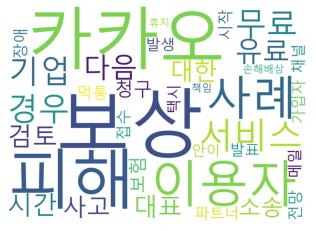

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

data = dict((word, cnt) for word, cnt in counter if cnt > 1)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                      width=2500,height=1800).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();